# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [382]:
import pandas as pd
import xlrd
import numpy as np

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [383]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000)
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_colwidth", 200)

In [385]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


In [387]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
df.columns = cols

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [19]:
df.shape

(30000, 15)

In [377]:
df.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date'],
      dtype='object')

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [ ]:
# This is a dataset with information about dogs and dog licenses in NYC.
# Each row represents an individual dog.
# The Animal Birth column represents the day a certain dog was born
# The Vaccinated column indicates if a dog was vaccinated or not

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [22]:
# How many dogs in NYC are unvaccinated?
# Did any dogs have expired licenses as of April 28, 2016, when the data was released?
# Is black the least common dog color in NYC?
# What's the most common dog name in NYC?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<AxesSubplot:>

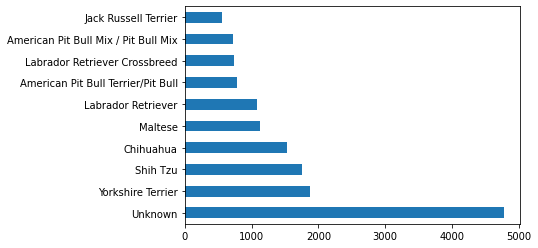

In [406]:
df.Primary_Breed.value_counts().sort_values(ascending=False).head(10).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot:>

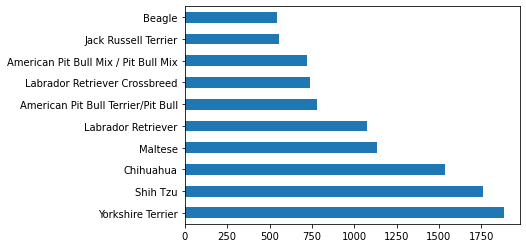

In [395]:
df.Primary_Breed[df.Primary_Breed != 'Unknown'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh')

## What are the most popular dog names?

In [39]:
df.Animal_Name[(df.Animal_Name != 'UNKNOWN') & (df.Animal_Name != 'Unknown')].value_counts().head()

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Name: Animal_Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [46]:
len(df.Animal_Name[df.Animal_Name == 'Alyssa'])

0

In [48]:
len(df.Animal_Name[df.Animal_Name == 'Max'])

202

In [49]:
len(df.Animal_Name[df.Animal_Name == 'Maxwell'])

11

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [74]:
df.Guard_or_Trained.value_counts(normalize=True) * 100

No     99.914254
Yes     0.085746
Name: Guard_or_Trained, dtype: float64

## What are the actual numbers?

In [97]:
# I ran this again after I changed the NaN values to "No"
df.Guard_or_Trained.value_counts()

No     19809
Yes       17
Name: Guard_or_Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [58]:
df.Guard_or_Trained.value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard_or_Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [79]:
df['Guard_or_Trained'] = df['Guard_or_Trained'].fillna('No')

In [93]:
df.Guard_or_Trained.value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard_or_Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [82]:
df.Primary_Breed[df.Guard_or_Trained == 'Yes'].value_counts().head()

Unknown                       5
German Shepherd Dog           3
Labrador Retriever            1
German Shepherd Crossbreed    1
Golden Retriever              1
Name: Primary_Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [84]:
year = df['Animal_Birth'].apply(lambda birth: birth.year)
df['year'] = year

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [87]:
age = 2020 - df['year']
df['age'] = age

In [89]:
df.age.mean()

10.712433333333333

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [119]:
df2 = pd.read_csv("zipcodes-neighborhoods.csv")

#df_name.merge(df2_name, left_on='column_name', right_on='column_name')
df3 = pd.merge(df, df2, left_on=['Owner_Zip_Code'], right_on=['zip'], how='left')

df3.head()

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,Greenwich Village and Soho,10013.0,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [133]:
#df3.groupby('borough').Animal_Name.value_counts(ascending=False).head(5)

Bronx_name = df3.Animal_Name[df3.neighborhood.str.contains('Bronx', na=False)].value_counts(ascending=False).head(1)
print(f'The most popular name in the Bronx is {Bronx_name}')

Brooklyn_name = df3.Animal_Name[df3.neighborhood.str.contains('Brooklyn', na=False)].value_counts(ascending=False).head(1)
print(f'The most popular name in Brooklyn is {Brooklyn_name}')

Upper_East_Side_name = df3.Animal_Name[df3.neighborhood.str.contains('Upper East Side', na=False)].value_counts(ascending=False).head(1)
print(f'The most popular name in the Upper East Side is {Upper_East_Side_name}')

The most popular name in the Bronx is Bella    15
Name: Animal_Name, dtype: int64
The most popular name in Brooklyn is Unknown    39
Name: Animal_Name, dtype: int64
The most popular name in the Upper East Side is Charlie    19
Name: Animal_Name, dtype: int64


## What is the most common dog breed in each of the neighborhoods of NYC?

In [305]:
# getting the number of neighborhoods in the dataframe
len(df3.neighborhood.value_counts())

42

In [306]:
df3.groupby('neighborhood').Primary_Breed.value_counts(ascending=False).nlargest(42)

neighborhood                   Primary_Breed     
Upper West Side                Unknown               358
Upper East Side                Unknown               307
Northwest Brooklyn             Unknown               285
South Shore                    Unknown               267
Chelsea and Clinton            Unknown               231
West Queens                    Unknown               191
Lower East Side                Unknown               185
West Central Queens            Unknown               175
Northwest Queens               Unknown               150
Southern Brooklyn              Unknown               138
Southeast Bronx                Unknown               136
Gramercy Park and Murray Hill  Unknown               134
Southwest Brooklyn             Unknown               129
Upper West Side                Labrador Retriever    121
North Queens                   Unknown               113
Greenwich Village and Soho     Unknown               110
Borough Park                   Unknown

## What breed of dogs are the least likely to be spayed? Male or female?

In [144]:
df.groupby('Animal_Gender').Spayed_or_Neut.value_counts(ascending=False)

Animal_Gender  Spayed_or_Neut
               Yes                   3
F              Yes               11786
               No                 1953
M              Yes               12874
               No                 3384
Name: Spayed_or_Neut, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [293]:
df3.Animal_Dominant_Color = df3.Animal_Dominant_Color.astype(str)
df3.Animal_Secondary_Color = df3.Animal_Secondary_Color.astype(str)
df3.Animal_Third_Color = df3.Animal_Third_Color.astype(str)

In [294]:
monochrome = (df3.Animal_Secondary_Color.isna()) & (df3.Animal_Dominant_Color.str.contains("black", na=False, case=False)) | (df3.Animal_Dominant_Color.str.contains("white", na=False, case=False)) | (df3.Animal_Dominant_Color.str.contains("gray", na=False, case=False))
df3['monochrome'] = monochrome

df3.monochrome.value_counts()

False    22189
True      7811
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:title={'center':'Dogs in each borough'}>

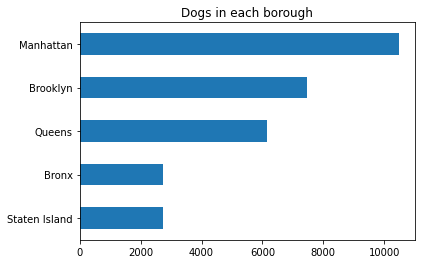

In [214]:
df3.borough.value_counts(ascending=True).plot(
    kind='barh',
    title='Dogs in each borough')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [218]:
df4 = pd.read_csv("boro_population.csv")
df5 = pd.merge(df3, df4, left_on=['borough'], right_on=['borough'], how='left')

In [315]:
df5.borough.value_counts()

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

In [347]:
df_borough_count = pd.DataFrame([ 
    {'borough': 'Manhattan', 'dog_total': 10478},
    {'borough': 'Brooklyn', 'dog_total': 7466},
    {'borough': 'Queens', 'dog_total': 6154},
    {'borough': 'Bronx', 'dog_total': 2748},
    {'borough': 'Staten Island', 'dog_total': 2748} 
])

df6 = pd.merge(df4, df_borough_count, left_on=['borough'], right_on=['borough'], how='left')
# divide this^ by df5.population

dog_per_capita = df6.dog_total/df6.population
df6['dog_per_capita'] = dog_per_capita

df6.dog_per_capita.sort_values(ascending=False).head(1).index
df6.loc[df6.index[df6.dog_per_capita.sort_values(ascending=False).head(1).index], ('borough', 'dog_per_capita')]

,borough,dog_per_capita
0,Manhattan,0.006371


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

<AxesSubplot:title={'center':'Top dog breeds in each borough'}, ylabel='borough,borough,Primary_Breed'>

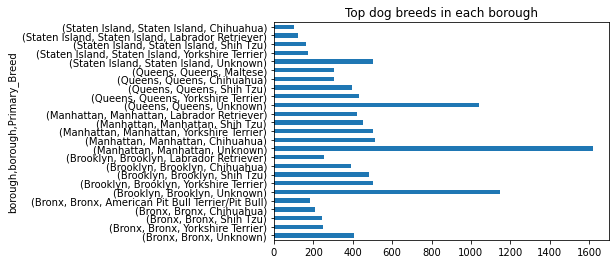

In [379]:
# note to myself: we made a series by doing groupby, therefore to call the boroughs again we have to treat them like an index
df3.groupby('borough').Primary_Breed.value_counts(ascending=False).groupby(level=0).nlargest() \
.plot(
     kind='barh',
     title='Top dog breeds in each borough')

## What percentage of dogs are not guard dogs?

In [381]:
df3.Guard_or_Trained.value_counts(normalize=True) * 100

No     99.914254
Yes     0.085746
Name: Guard_or_Trained, dtype: float64